# Actividad I

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dataset/daily-max-temperatures.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace= True)
df.head(5)

,Temperature
Date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5


## I - Descripcion de datos

In [3]:
# 1. Daily Temperature Change
df['Daily Change'] = df['Temperature'].diff()

# 2. Rolling Averages (3 and 7 day rolling average)
df['3-Day Rolling Avg'] = df['Temperature'].rolling(window=3).mean()
df['7-Day Rolling Avg'] = df['Temperature'].rolling(window=7).mean()
# 3. Monthly Averages
monthly_avg = df['Temperature'].resample('ME').mean()

# 4. Yearly Trends
yearly_avg = df['Temperature'].resample('YE').mean()

# 5. Anomalies
mean_temp = df['Temperature'].mean()
std_temp = df['Temperature'].std()
df['Anomaly'] = (df['Temperature'] > mean_temp + 1.5 * std_temp) | (df['Temperature'] < mean_temp - 1.5 * std_temp)

# 6. Seasons
seasonal_patterns = df['Temperature'].groupby(df.index.month).mean()

# 7. Temperature Distribution
temperature_distribution = df['Temperature'].describe()


<Axes: ylabel='Frequency'>

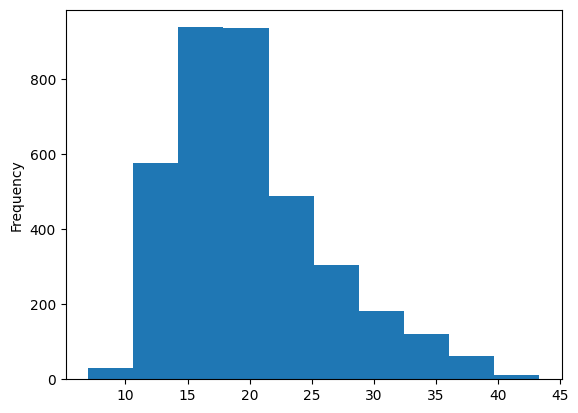

In [4]:
df['Temperature'].plot(kind="hist")

In [5]:
df['Temperature'].median()

np.float64(18.9)

Las temperaturas mas frecuentes se encuentran en el rango de 15-22 grados, la mediana es de 18.9 grados

In [6]:
temperature_distribution

count    3650.000000
mean       20.009151
std         6.108353
min         7.000000
25%        15.400000
50%        18.900000
75%        23.000000
max        43.300000
Name: Temperature, dtype: float64

En promedio la temperatura diaria es de 20 grados

## plots

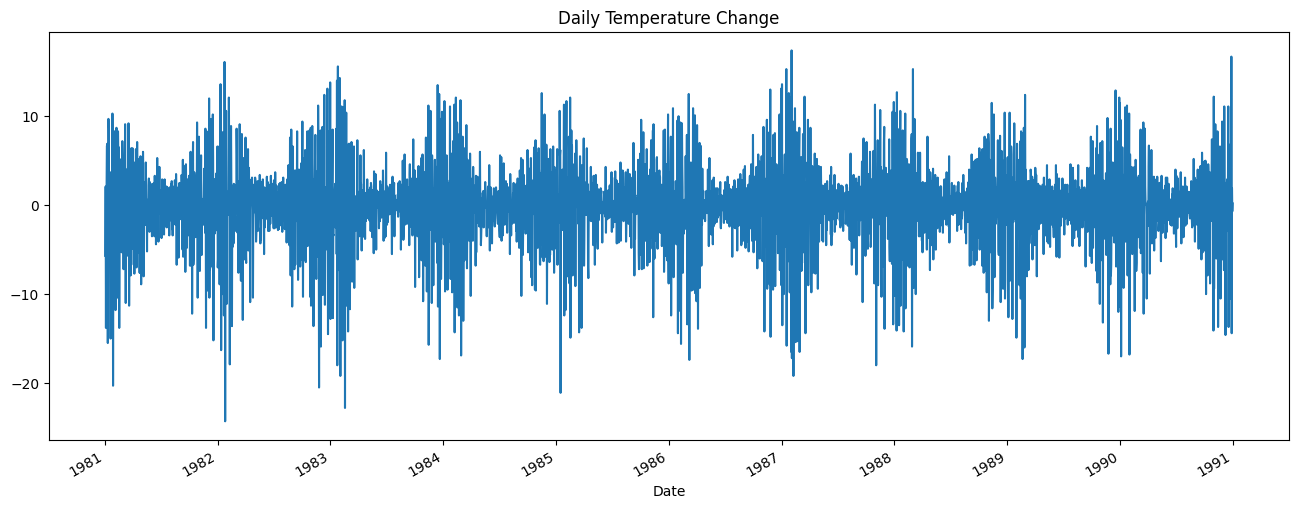

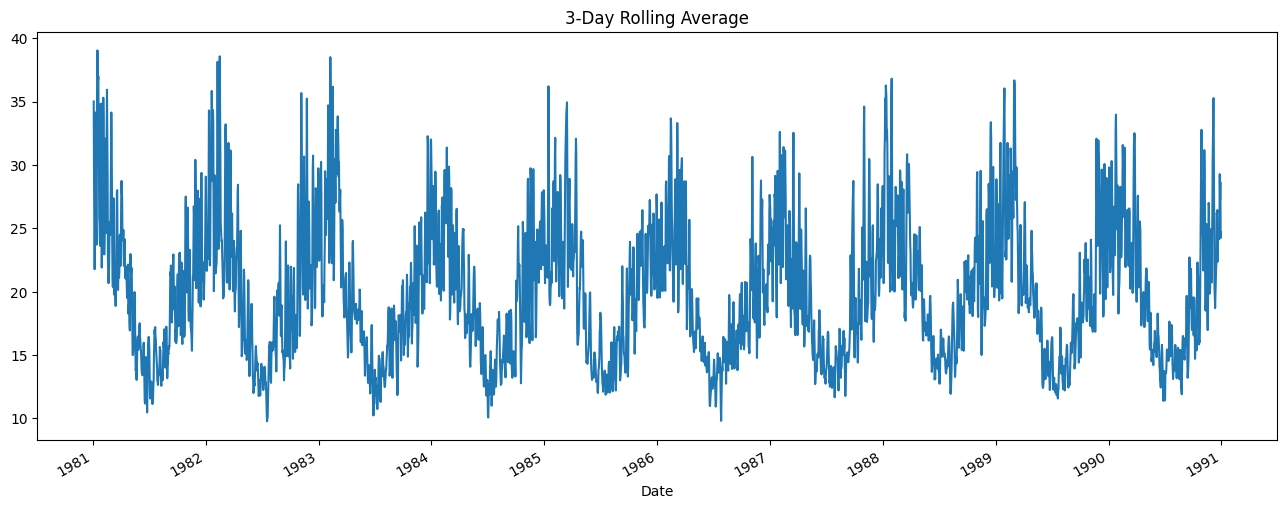

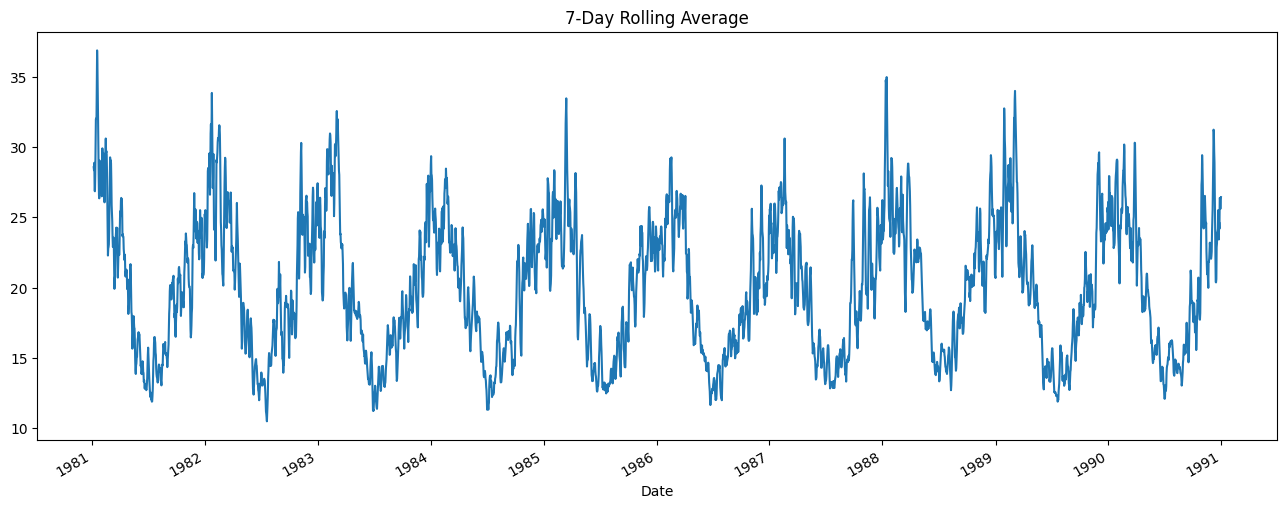

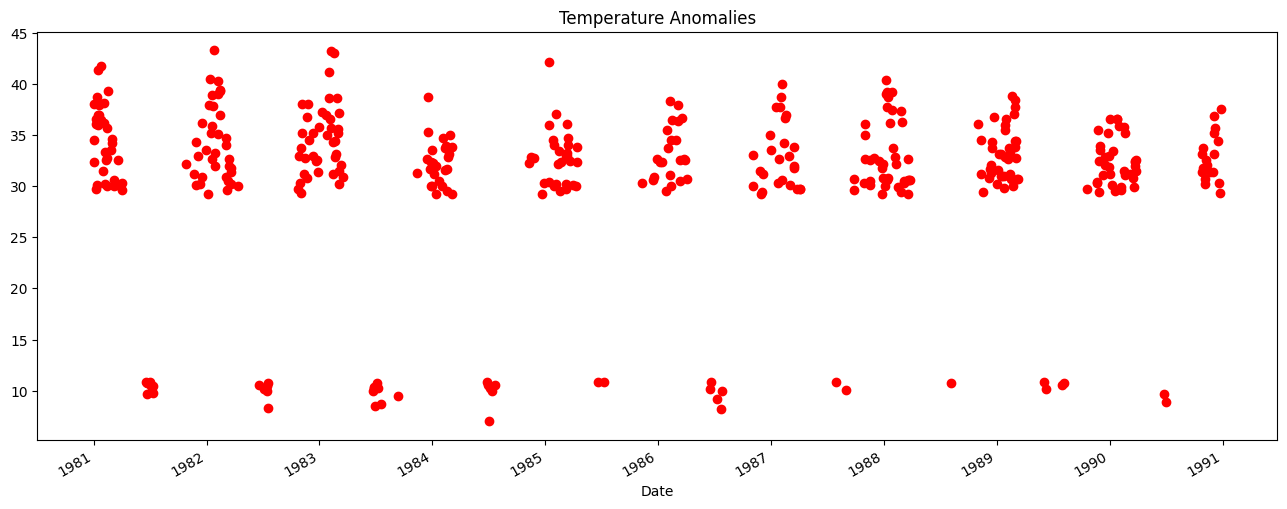

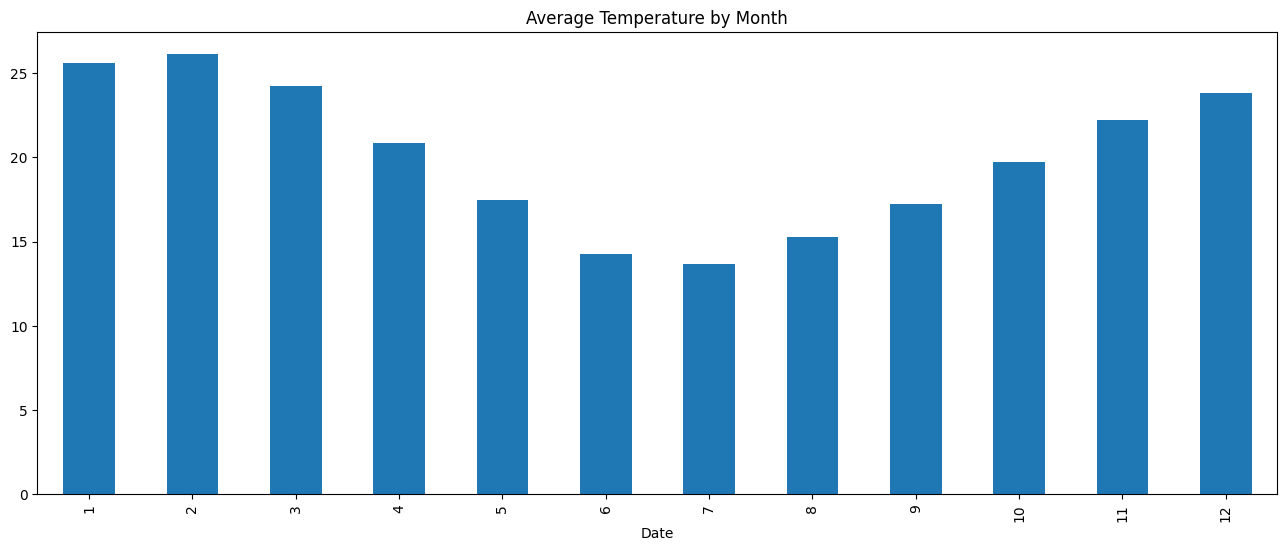

In [7]:
# Plot Daily Temperature Change
df['Daily Change'].plot(title='Daily Temperature Change', figsize=(16,6))
plt.show()

# Plot 3-Day Rolling Average
df['3-Day Rolling Avg'].plot(title='3-Day Rolling Average', figsize=(16,6))
plt.show()

# Plot 7-Day Rolling Average
df['7-Day Rolling Avg'].plot(title='7-Day Rolling Average', figsize=(16,6))
plt.show()

# Plot Anomalies
df[df['Anomaly']]['Temperature'].plot(title='Temperature Anomalies',marker = "o", linestyle='None', color='r', figsize=(16,6))
plt.show()

# Plot Seasonal Patterns
seasonal_patterns.plot(kind='bar', title='Average Temperature by Month', figsize=(16,6))
plt.show()

### Diferenciacion

In [8]:
df['d1b']=df['Temperature'].diff()
df.head(5)

,Temperature,Daily Change,3-Day Rolling Avg,7-Day Rolling Avg,Anomaly,d1b
Date,,,,,,
1981-01-01,38.1,NaN,NaN,NaN,True,NaN
1981-01-02,32.4,-5.7,NaN,NaN,True,-5.7
1981-01-03,34.5,2.1,35.000000,NaN,True,2.1
1981-01-04,20.7,-13.8,29.200000,NaN,False,-13.8
1981-01-05,21.5,0.8,25.566667,NaN,False,0.8


<Axes: title={'center': 'Diferenciación de primer orden'}, xlabel='Date'>

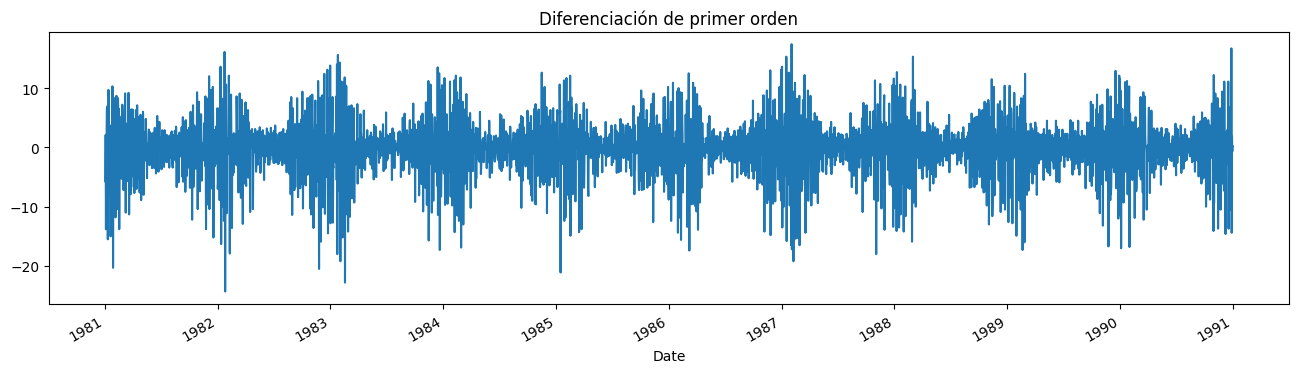

In [9]:
df["d1b"].plot(title="Diferenciación de primer orden",figsize = (16,4))

In [10]:
df['d2b']=df['d1b'].diff()
df.head(5)

,Temperature,Daily Change,3-Day Rolling Avg,7-Day Rolling Avg,Anomaly,d1b,d2b
Date,,,,,,,
1981-01-01,38.1,NaN,NaN,NaN,True,NaN,NaN
1981-01-02,32.4,-5.7,NaN,NaN,True,-5.7,NaN
1981-01-03,34.5,2.1,35.000000,NaN,True,2.1,7.8
1981-01-04,20.7,-13.8,29.200000,NaN,False,-13.8,-15.9
1981-01-05,21.5,0.8,25.566667,NaN,False,0.8,14.6


<Axes: title={'center': 'Diferenciación de segundo orden'}, xlabel='Date'>

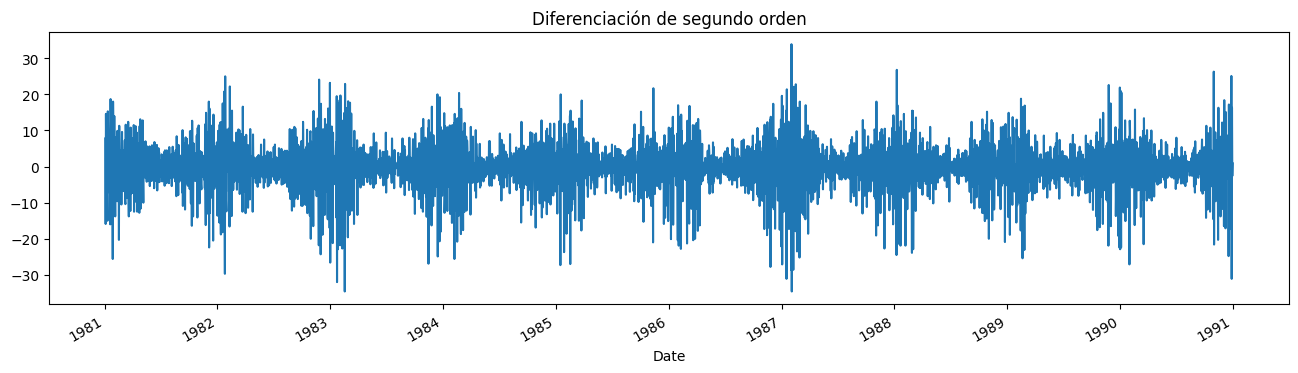

In [11]:
df["d2b"].plot(title="Diferenciación de segundo orden",figsize = (16,4))

# ETS aditivo

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

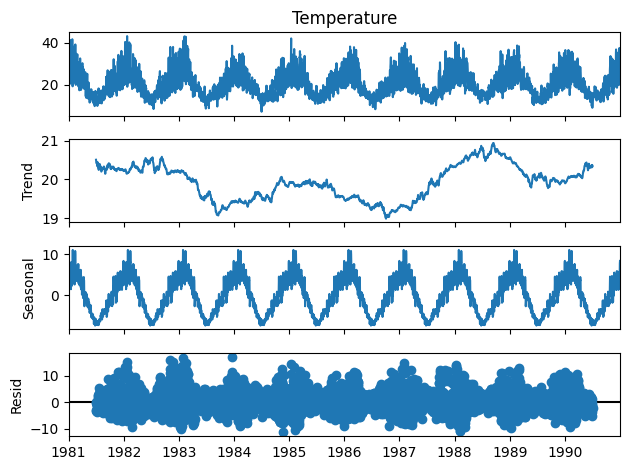

In [13]:
result = seasonal_decompose(df['Temperature'],model = 'aditive',period = 365)
result.plot();

# Hodrick-Prescott

In [14]:
temp_cycle, temp_trend = hpfilter(df['Temperature'],lamb=1e5)

<Axes: title={'center': 'Temperature and HP Filter Trend'}, xlabel='Date'>

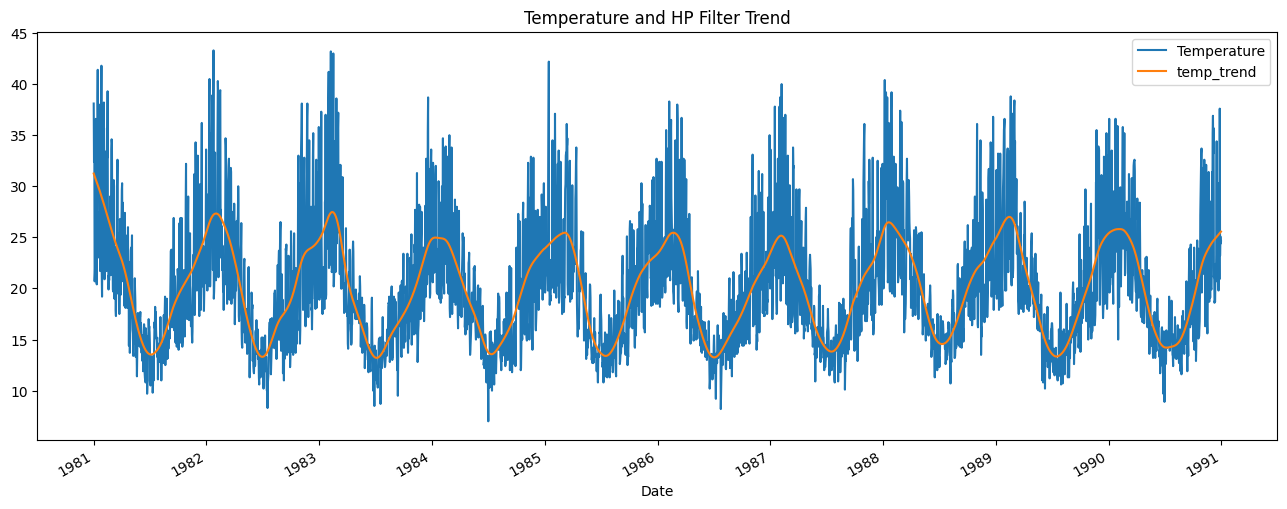

In [15]:
df["temp_trend"] = temp_trend
df[['Temperature', 'temp_trend']].plot(title='Temperature and HP Filter Trend',figsize=(16,6))

# Suavizado exponencial de 1ero, 2ndo y tercer orden

In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [35]:
span = 365
alpha = 2/(span+1)

In [36]:
alpha

0.00546448087431694

In [37]:
df['temp_ses'] = SimpleExpSmoothing(df['Temperature']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

/Users/rodz/Documents/projects/Time-series/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Temperature,Daily Change,3-Day Rolling Avg,7-Day Rolling Avg,Anomaly,d1b,d2b,temp_trend,temp_smooth,temp_ses
Date,,,,,,,,,,
1981-01-01,38.1,NaN,NaN,NaN,True,NaN,NaN,31.248098,38.100000,38.100000
1981-01-02,32.4,-5.7,NaN,NaN,True,-5.7,NaN,31.162955,38.068852,38.068852
1981-01-03,34.5,2.1,35.000000,NaN,True,2.1,7.8,31.077881,38.049351,38.049351
1981-01-04,20.7,-13.8,29.200000,NaN,False,-13.8,-15.9,30.992955,37.954545,37.954545
1981-01-05,21.5,0.8,25.566667,NaN,False,0.8,14.6,30.908295,37.864630,37.864630


In [54]:
df['temp_des'] = ExponentialSmoothing(df['Temperature'],trend='add').fit().fittedvalues.shift(-1)
df['temp_des_mul'] = ExponentialSmoothing(df['Temperature'],trend='mul').fit().fittedvalues.shift(-1)

/Users/rodz/Documents/projects/Time-series/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rodz/Documents/projects/Time-series/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


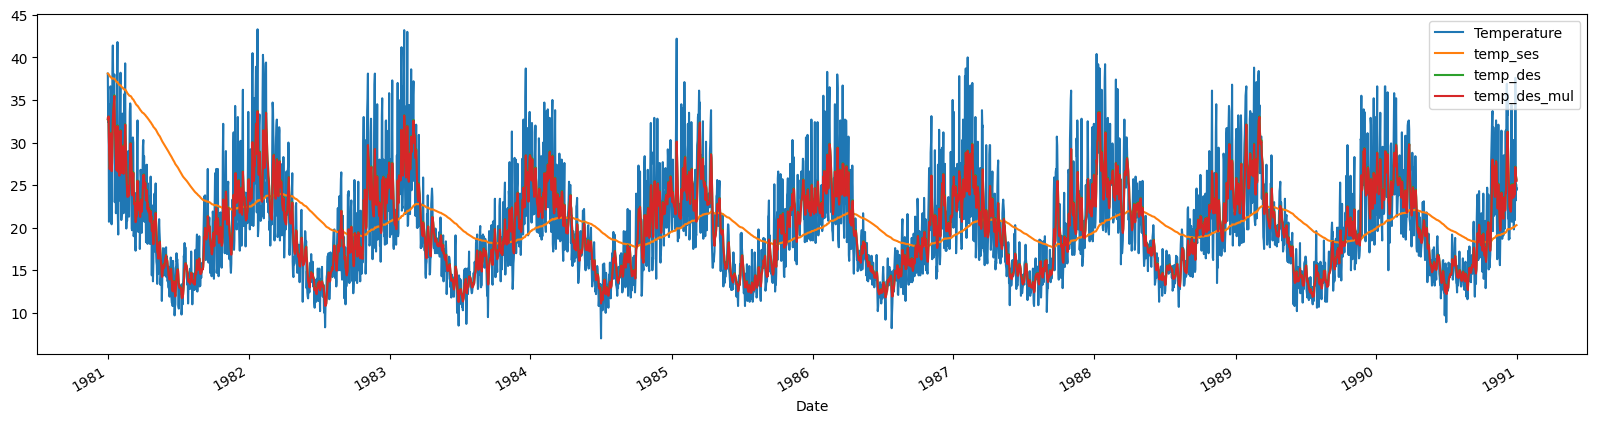

In [76]:
df[['Temperature','temp_ses','temp_des','temp_des_mul']].plot(figsize=(20,5));

Como los datos son diarios la variable estacional = 7

In [74]:
days = 7
df['temp_tes_add'] = ExponentialSmoothing(df['Temperature'],trend='add',seasonal='add',seasonal_periods=days).fit().fittedvalues

df['temp_tes_mul'] = ExponentialSmoothing(df['Temperature'],trend='mul',seasonal='mul',seasonal_periods=days).fit().fittedvalues

/Users/rodz/Documents/projects/Time-series/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rodz/Documents/projects/Time-series/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


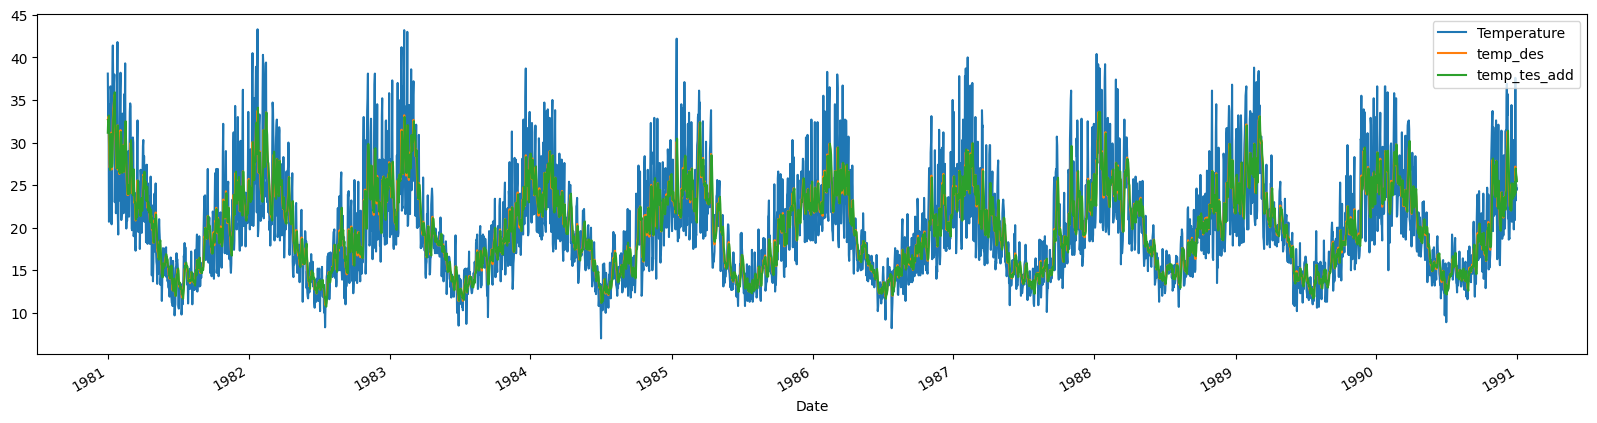

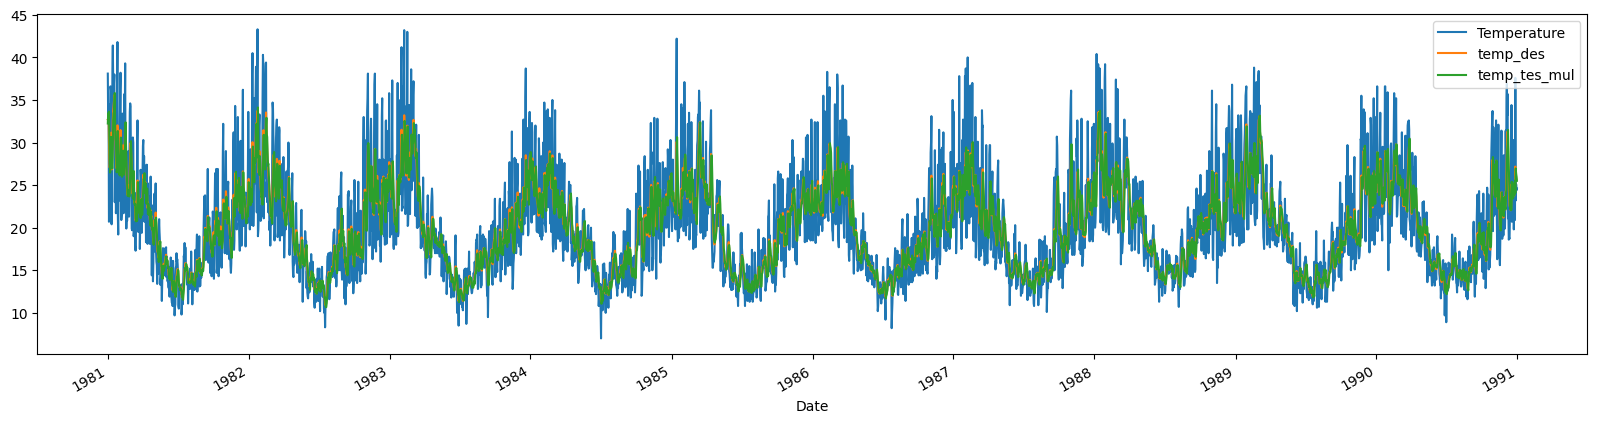

In [77]:
df[['Temperature','temp_des','temp_tes_add']].plot(figsize=(20,5));
plt.show()

df[['Temperature','temp_des', 'temp_tes_mul']].plot(figsize=(20,5));
plt.show()

# ACF y PACF

In [78]:
import statsmodels.graphics.tsaplots as sgt

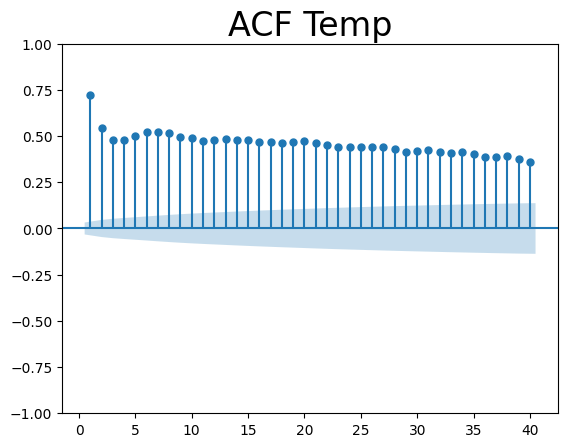

In [91]:
sgt.plot_acf(df['Temperature'], lags = 40, zero = False)
plt.title('ACF Temp', size = 24)
plt.show()

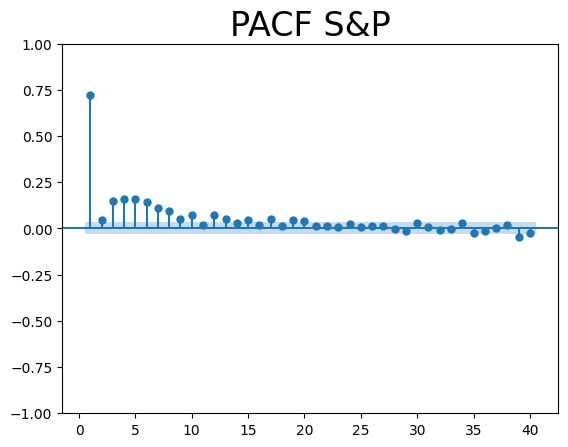

In [90]:
sgt.plot_pacf(df['Temperature'], lags = 40, zero = False)
plt.title('PACF S&P', size = 24)
plt.show()

# Hacer la autocorrelación para distintos valores de rezago, hacer el correlograma.

In [98]:
lags = np.linspace(10,100,10, dtype = np.int32)
lags

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100], dtype=int32)

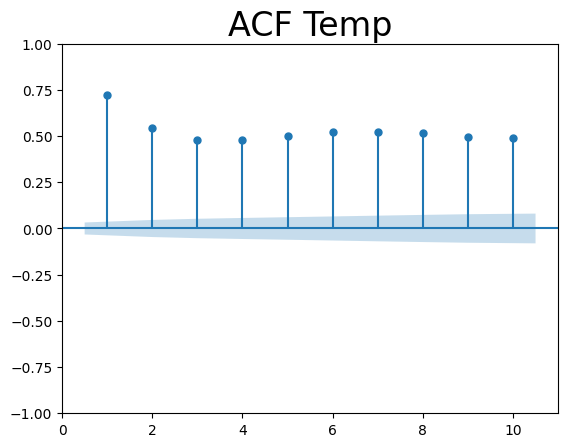

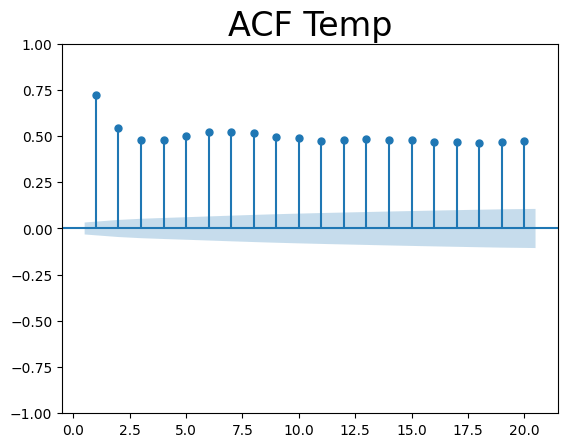

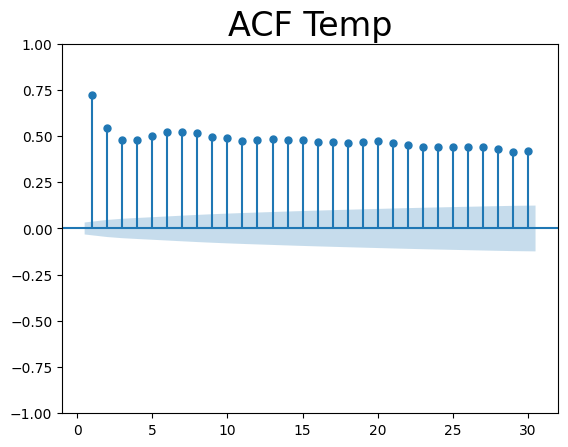

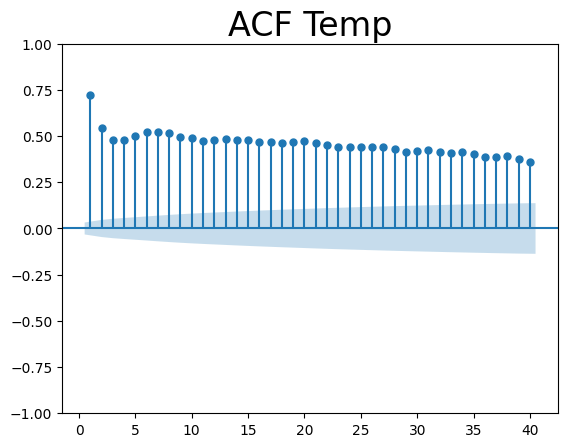

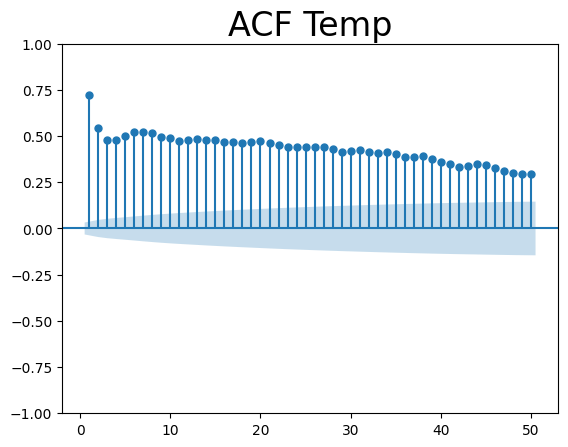

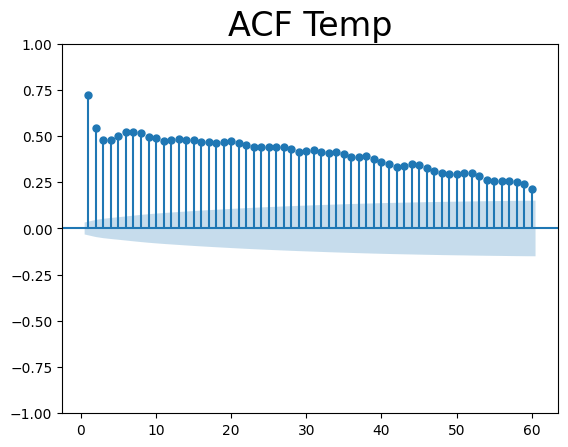

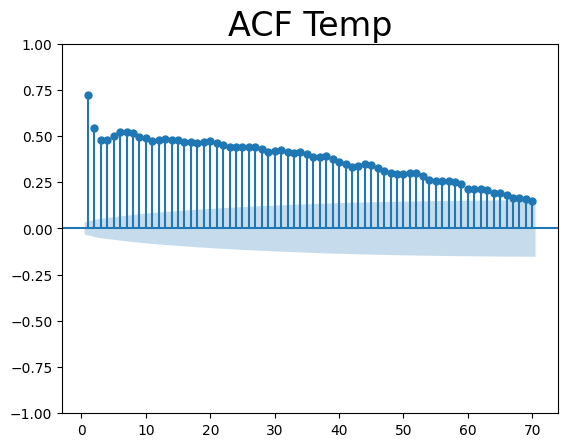

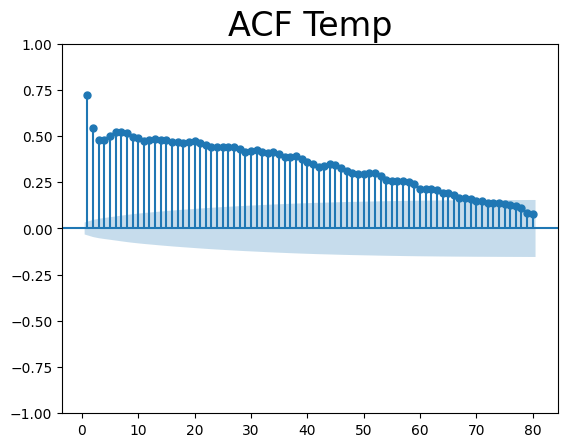

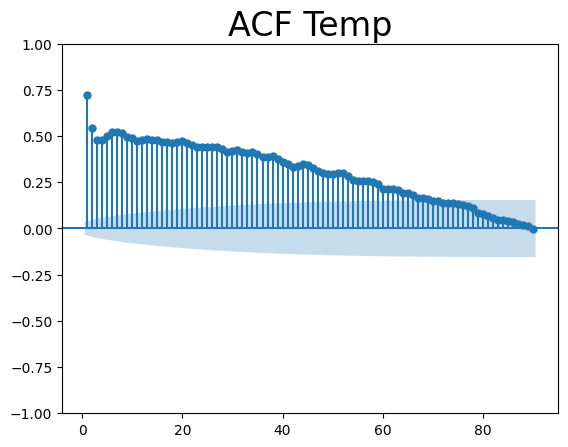

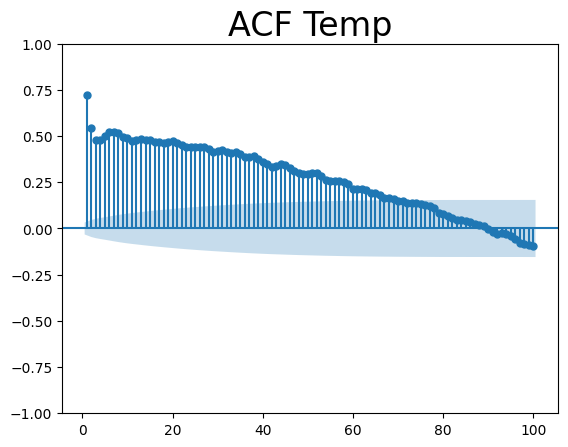

In [99]:
for lag in lags:
    sgt.plot_acf(df['Temperature'], lags = lag, zero = False)
    plt.title('ACF Temp', size = 24)
    plt.show()

## II - Coseno aleatorio

Partiendo del modelo estocástico del coseno aleatorio visto en clase, definimos:

\begin{align}
\mu_t = A \cos[2\pi(\frac{t}{12} + \Phi)] + B \hspace{0.1cm}  \forall \hspace{0.1cm}  t \hspace{0.1cm}  \epsilon \hspace{0.1cm}  Z
\end{align}

donde $\Phi$ se selecciona (una vez) de una distribución uniforme en el [0,1], y (A,B) son
variables aleatorias discretas con probabilidad conjunta
siendo: $$𝑃(𝐴=𝑎,𝐵=𝑏)= 𝑎/20 \hspace{0.1cm} 𝑟𝑎𝑛𝑔𝑜 \hspace{0.1cm}(𝐴)={1,2,3}  \hspace{0.1cm} 𝑦 \hspace{0.1cm}  𝑟𝑎𝑛𝑔𝑜(𝐵)={1,...,𝑎+1}$$ 

- Calcule la media del proceso Y(t).
- Calcule la autocorrelación del proceso Y(t)
- Analice la estacionariedad. Justifique su respuesta.

# A) Media del proceso Y(t)

Siendo $\mu_t = \Epsilon[Y_t]$ en este caso:

\begin{align}
\mu_t = \Epsilon[A \cos[2\pi(\frac{t}{12} + \Phi)] + B]
\end{align}

Entonces:

\begin{align}
\Epsilon[\cos[2\pi(\frac{t}{12} + \Phi)]] = \int_{0}^{1} \cos[2\pi(\frac{t}{12} + \phi)] \,d\phi\
\end{align}

## Resolucion de integral:

Mediante sustitucion obtenemos $u = 2\pi(\frac{t}{12} + \phi)$ entonces $du = 2\pi d\phi$ 

\begin{align}
\int_{0}^{1} \cos[2\pi(\frac{t}{12} + \phi)] \,d\phi\ = \frac{1}{2\pi} \int_{0}^{1}  \cos(u) du
\end{align}

\begin{align}
\frac{1}{2\pi} \int_{0}^{1}  \cos(u) du = \frac{1}{2\pi} \sin(2\pi(\frac{t}{12} + \phi) \Big|_0^1
\end{align}

\begin{align}
\frac{1}{2\pi} \sin(2\pi(\frac{t}{12} + \phi) )\Big|_0^1 = \frac{1}{2\pi} \sin(2\pi(\frac{t}{12} + 1) ) - \frac{1}{2\pi} \sin(2\pi(\frac{t}{12} + 0) )
\end{align}

\begin{align}
\frac{1}{2\pi}( \sin(\frac{2\pi t}{12} + 2\pi ) - \frac{1}{2\pi} \sin(\frac{2\pi t}{12}))
\end{align}

### Por periodicidad de la funcion seno: $\sin(\frac{2\pi t}{12} + 2\pi) =\sin(\frac{2\pi t}{12}) $ 

\begin{align}
\frac{1}{2\pi}(\sin(\frac{2\pi t}{12})) - \frac{1}{2\pi} \sin(\frac{2\pi t}{12})) = 0
\end{align}

Entonces:

\begin{align}
\Epsilon[\cos[2\pi(\frac{t}{12} + \Phi)]] = 0
\end{align}

Por lo tanto:

\begin{align}
\Epsilon[A \cos[2\pi(\frac{t}{12} + \Phi)]] = 0 \\

\Epsilon[A] * 0 = 0 \\
\end{align}

Esto significa que:

\begin{align}
\mu_y = \Epsilon[Y_t] = \Epsilon[B] \\
\end{align}


Para encontrar \Epsilon[B] se utiliza la distribucion conjunta de (A,B)

\begin{align}
\Epsilon[B] = \sum_{a=1}^{3} \sum_{b=1}^{a + 1}{b P(A=a, B=b)} \\
\Epsilon[B] = \sum_{a=1}^{3} \sum_{b=1}^{a + 1}{b * \frac{1}{20}} \\
\end{align}

El siguiente fragmento de codigo es utilizado para calcular la media del proceso:

In [106]:
def calculate_mean():
    mean = 0
    # a  1-> 3
    for a in range(1, 4):
        # b 1 -> a+1
        for b in range(1, a + 2):
            prob = a / 20

            mean += b * prob

    return mean

In [112]:
e_b = calculate_mean()
print(f"la media del proceso Y(t) es igual a: {e_b}")

la media del proceso Y(t) es igual a: 2.25


# B) Calcule la autocorrelacion del proceso Y(t)


$$
R(\tau) = \Epsilon[(Y_t - \mu_t)(Y_{t-\tau} - \mu_t)] \\

\mu_y = \Epsilon[B] \hspace{0.1cm} (\hspace{0.1cm}inciso \hspace{0.1cm} A) \\


R(\tau) = \Epsilon[(A \cos[2\pi(\frac{t}{12} + \Phi)] + B - \Epsilon[B])(A \cos[2\pi(\frac{t-\tau}{12} + \Phi)] + B - \Epsilon[B]) ] \\
$$

### Simplificando 

$$

R(\tau) = \Epsilon[(A^2 \cos[2\pi(\frac{t}{12} + \Phi)])(\cos[2\pi(\frac{t-\tau}{12} + \Phi)]) + \Epsilon[B^2] - \Epsilon[B]^2 \\

$$

Utilizando la identidad, se simplifica
$$
cos(A)cos(B) = \frac{1}{2}(\cos(A-B) +\cos(A+B))
$$

$$
(\cos[2\pi(\frac{t}{12} + \Phi)])(\cos[2\pi(\frac{t-\tau}{12} + \Phi)]) = \frac{1}{2}[\cos(2\pi(\frac{\tau}{12})) + \cos(2\pi(\frac{2t - \tau}{12} + 2\Phi))  ]

$$

Debido a que $\Phi$ es una uniforme en [0,1] la esperanza del segundo termino es 0, porque la media del cos en un ciclo completo es 0, entocnes se obtiene:

$$
\frac{1}{2}\cos(2\pi(\frac{\tau}{12}))
$$

Finalmente:
$$
R(\tau) =  \frac{1}{2}\Epsilon[A^2]\frac{1}{12} (\cos[2\pi(\frac{\tau}{12})]) + Var(B)
$$

Para obtener la funcion de autocorrelacion:
$$
r(\tau) = \frac{R(\tau)}{R(0)} \\ 

r(\tau) = \frac{\frac{1}{2}\Epsilon[A^2]\frac{1}{12} (\cos[2\pi(\frac{\tau}{12})]) + Var(B)}{\frac{1}{2}\Epsilon[A^2]\frac{1}{12} + Var(B)}
$$



# B) Analisis de estacionariedad

En este caso el proceso Y(t) es debilmente estacionario debido a:
- La media es constante en el tiempo dada por $\Epsilon[B] = 2.25$.
- la autocovarianza no depende del tiempo solo de $\tau$.